<a href="https://colab.research.google.com/github/athiratj/30Days-of-Code/blob/master/Copy_of_water_quantification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Surface Water Extent Estimation

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import requests
import urllib.parse
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.rcParams["font.family"] = "monospace"
%matplotlib inline

## Get water quantification data for lake Folsom using its asset ID

**Step 1: Import Required Libraries**

- After importing the necessary libraries, you will be able to fetch the surface water extent of the lake.

**Step 2: Obtain an API Key**
   - To access our APIs, you must obtain an API key.
   - Sign up at `www.data.blueskyhq.io` to receive an API key with the required permissions attached.

**Step 3: Identify the Lake of Interest**
   - Determine which lake you want to retrieve data for.
   - You will need the **asset ID** for the corresponding lake.
   - To find the asset ID, search for the lake's name on `www.spacetime.blueskyhq.io/asset-explorer`.
   - An asset ID is a unique identifier for the specific asset, such as a lake or a power plant.

**Step 4: Replace the Asset ID**
   - Once you have the asset ID, replace the default asset ID in the code with the one you've obtained.

**Step 5: Set the Date Range**
   - Define the date range for the measurements you need. Specify the start and end dates accordingly.

**Step 6: Run the Code**
   - Execute the code provided, and it will fetch the surface water extent data for the specified lake within the defined date range.

By following these steps, you can effectively access the surface water extent data for your chosen lake using the API key you obtained.

In [ ]:
# API Key for accessing the data
API_KEY = "44625f06-6d33-5426-a9e6-2015a0caebd6"
# unique id for the asset
ASSET_ID = "ae096c2b-8231-4d79-9634-0f97ef4c93cc"
# API endpoint or url
API = f"https://gateway.blueskyhq.io/api/water-quantification/{ASSET_ID}"
# start date
START_DATE = "2018-01-01T00:00:00.000Z"
# end data
END_DATE = "2023-08-01T00:00:00.000Z"
TIME_BUCKET = "1d"
# requested parameters
PARAMS = {
    "api-key": API_KEY,
    "start_date": START_DATE,
    "end_date": END_DATE,
    "time_bucket": TIME_BUCKET,
}
HEADERS = {
    "Content-Type": "application/json",
}

# api request
response = requests.get(API, headers=HEADERS, params=urllib.parse.urlencode(PARAMS))
if response.status_code == 200:
    pprint(response.json())
else:
    print(response.text)

{'data': [{'area': 26.79,
           'datetime': '2018-01-20T00:00:00.000Z',
           'perimeter': 3.25},
          {'area': 31.92,
           'datetime': '2018-03-11T00:00:00.000Z',
           'perimeter': 5.22},
          {'area': 38.72,
           'datetime': '2018-03-26T00:00:00.000Z',
           'perimeter': 3.59},
          {'area': 42.12,
           'datetime': '2018-04-20T00:00:00.000Z',
           'perimeter': 3.87},
          {'area': 43.53,
           'datetime': '2018-04-25T00:00:00.000Z',
           'perimeter': 4.65},
          {'area': 45.36,
           'datetime': '2018-05-15T00:00:00.000Z',
           'perimeter': 4.64},
          {'area': 44.62,
           'datetime': '2018-06-04T00:00:00.000Z',
           'perimeter': 4.44},
          {'area': 44.48,
           'datetime': '2018-06-14T00:00:00.000Z',
           'perimeter': 4.7},
          {'area': 45.25,
           'datetime': '2018-06-19T00:00:00.000Z',
           'perimeter': 4.54},
          {'area': 43.34,
   

## Plot the response as time series graph

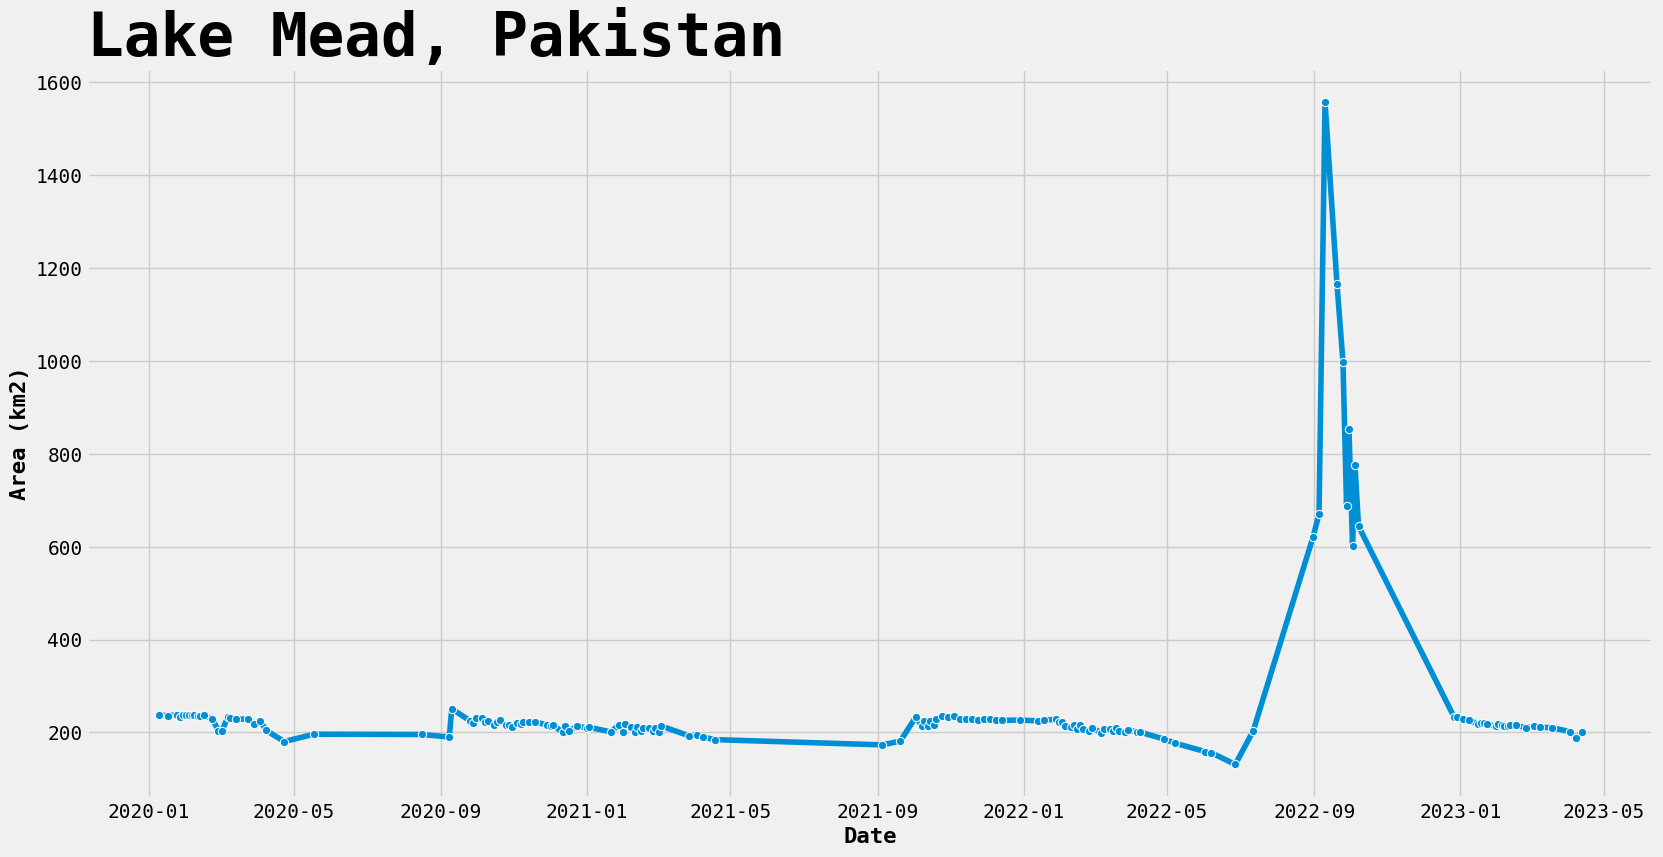

In [ ]:
# convert response json to dataframe
df = pd.DataFrame(response.json()["data"])
# datetime string to dateime object
df["datetime"] = pd.to_datetime(df["datetime"])

fig, ax = plt.subplots(1,1, figsize=(18,9))
# plot line chart
sns.lineplot(df, x="datetime", y="area", ax=ax, linestyle="-", marker='o')
# set x,y labels
ax.set_ylabel("Area (km2)", fontsize=16, fontweight="bold")
ax.set_xlabel("Date", fontsize=16, fontweight="bold")
ax.set_title("Lake Mead, Pakistan", fontsize=44, fontweight="bold", loc="left")
# font adjustments
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [ ]:
df.to_csv("./Oroville.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  163 non-null    int64              
 1   datetime    163 non-null    datetime64[ns, UTC]
 2   area        143 non-null    float64            
 3   perimeter   143 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1)
memory usage: 5.2 KB
None
   Unnamed: 0                  datetime    area  perimeter
0           0 2018-01-02 00:00:00+00:00  198.69       3.32
1           1 2018-01-07 00:00:00+00:00  190.52       3.36
2           2 2018-01-17 00:00:00+00:00  163.02       3.16
3           3 2018-01-22 00:00:00+00:00  150.46       2.99
4           4 2018-02-26 00:00:00+00:00   81.44       2.12


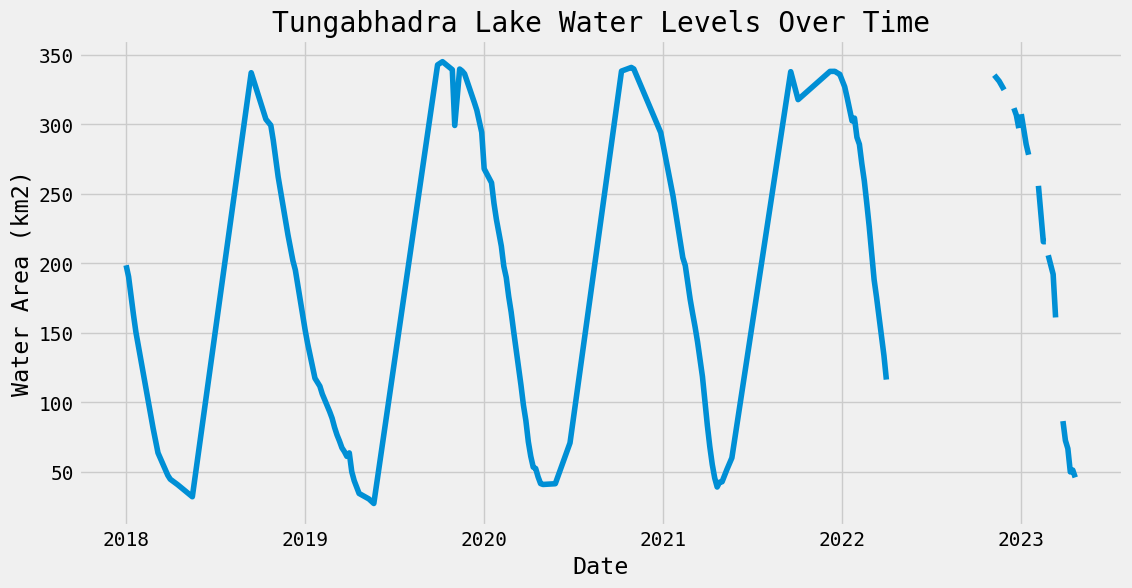

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "/content/Tungabhadra.csv"
df = pd.read_csv(url, parse_dates=["datetime"])

# Check the structure of the dataset
print(df.info())
print(df.head())

# Basic time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['area'])
plt.title('Tungabhadra Lake Water Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Water Area (km2)')
plt.show()

In [ ]:
# Descriptive statistics
print(df.describe())

# Handle missing values (if any)
df = df.dropna()

# Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['area'], model='multiplicative', period=143)
result.plot()
plt.show()

       Unnamed: 0        area   perimeter
count  143.000000  143.000000  143.000000
mean    73.335664  179.793706   43.403566
std     45.087855  108.263523  123.762414
min      0.000000   27.270000    0.970000
25%     35.500000   71.305000    2.255000
50%     71.000000  175.580000    3.470000
75%    106.500000  289.650000    3.910000
max    160.000000  345.180000  555.330000


ValueError: ignored

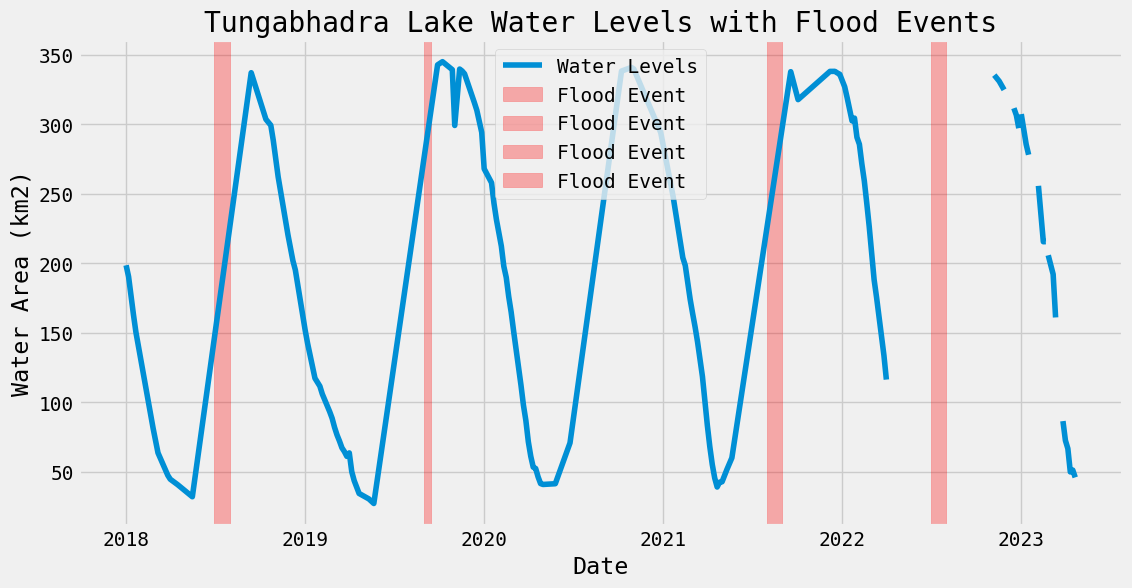

In [ ]:
# Collect external data on floods and droughts
# Assuming you have a list of events with start and end dates

# Example: Flood events
floods = [('2018-07-01', '2018-08-01'), ('2019-09-01', '2019-09-15'), ('2021-09-01', '2021-08-01'), ('2022-07-01', '2022-08-01')]

# Plotting external events
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['area'], label='Water Levels')
for start, end in floods:
    plt.axvspan(start, end, color='red', alpha=0.3, label='Flood Event')
plt.title('Tungabhadra Lake Water Levels with Flood Events')
plt.xlabel('Date')
plt.ylabel('Water Area (km2)')
plt.legend()
plt.show()

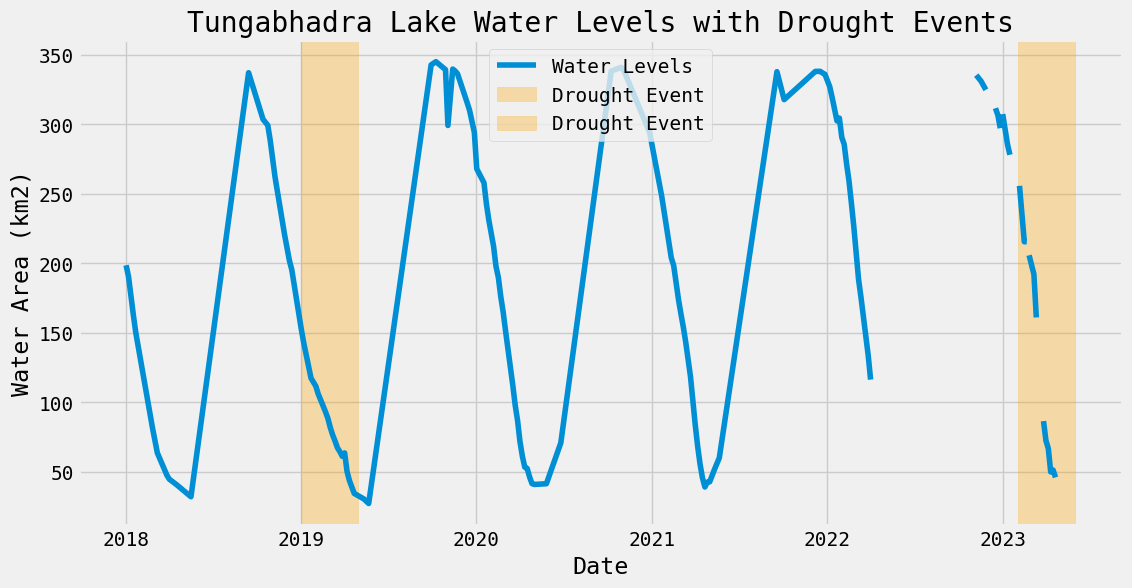

In [ ]:
# Collect external data on floods and droughts
# Assuming you have a list of events with start and end dates

# Example: Flood events
droughts = [('2019-01-01', '2019-04-30'), ('2023-02-01', '2023-06-01')]

# Plotting external events
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['area'], label='Water Levels')
for start, end in droughts:
    plt.axvspan(start, end, color='orange', alpha=0.3, label='Drought Event')
plt.title('Tungabhadra Lake Water Levels with Drought Events')
plt.xlabel('Date')
plt.ylabel('Water Area (km2)')
plt.legend()
plt.show()

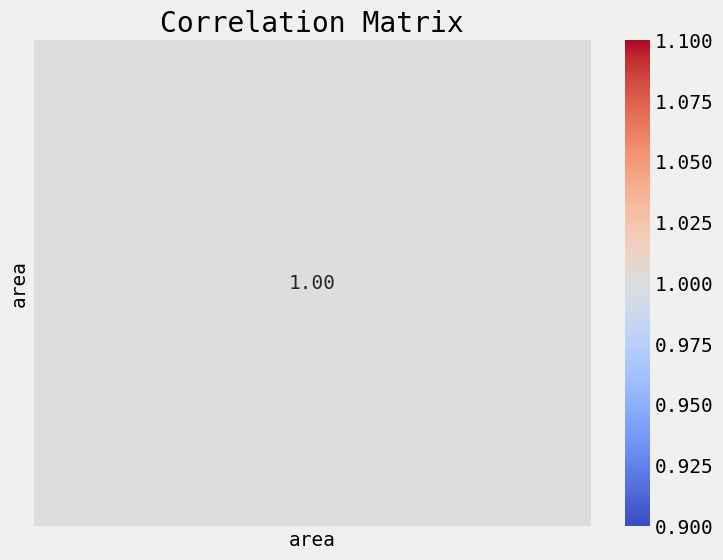

In [ ]:
# Heatmap for correlation
correlation_matrix = df[['area']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
